## Import Python Packages

In [4]:
import numpy as np
import scipy as sci
import pyDOE
import matplotlib.pyplot as plt
import itertools
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa.holtwinters import ExponentialSmoothing
%matplotlib inline
import sklearn
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize, TweetTokenizer
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB,BernoulliNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
nltk.download('punkt')
import re, string
from wordcloud import WordCloud
import seaborn as sns
sns.set_style('white')
nltk.download('stopwords')
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')
#nltk.download('all')
import warnings
warnings.simplefilter("ignore", DeprecationWarning)
from sklearn.decomposition import LatentDirichletAllocation as LDA
from pyLDAvis import sklearn as sklearn_lda
import pyLDAvis
from textblob import TextBlob
import time

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dw998\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dw998\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dw998\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Read in Data

In [5]:
joe_biden_df=pd.read_csv('hashtag_joebiden.csv')
biden_subset=joe_biden_df[['tweet','user_location']].dropna()
joe_biden_df.dtypes
biden_subset

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tweet,user_location
0,#Elecciones2020 | En #Florida: #JoeBiden dice ...,"Philadelphia, PA / Miami, FL"
2,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,Golden Valley Arizona
4,#censorship #HunterBiden #Biden #BidenEmails #...,"California, USA"
6,"In 2020, #NYPost is being #censorship #CENSORE...","Chicago, Illinois"
7,►► Tell Politicians to STICK IT with this FREE...,USA - Land of the FREE!
11,"FBI Allegedly Obtained Hunter Biden Computer, ...","Kentucky, USA"
13,Y’all Just Locking Up Accounts Cause YALL Dont...,H-Town
15,#IceCube isn’t a sellout how long are black pe...,🇨🇱🇧🇸
17,"Comments on this? ""Do Democrats Understand how...","Tampa, Florida"
19,I’m going to share things I like about Biden m...,"Rosemount, MN"


## Clean Data

In [4]:
x = biden_subset["tweet"].copy()
y = biden_subset["user_location"].copy()
def clean_text(review):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    review = review.lower()
    review = re.sub('\[.*?\]', '', review)
    review = re.sub('[%s]' % re.escape(string.punctuation), '', review)
    review = re.sub('\w*\d\w*', '', review)
    review = re.sub('[‘’“”…]', '', review)
    review = re.sub('\n', '', review)
    stop_words=set(stopwords.words('english'))
    return review
round1 = lambda x: clean_text(x)
biden_subset['clean'] = x.apply(round1)

<>:6: DeprecationWarning: invalid escape sequence \[
<>:8: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \[
<>:8: DeprecationWarning: invalid escape sequence \w
<>:6: DeprecationWarning: invalid escape sequence \[
<>:8: DeprecationWarning: invalid escape sequence \w
<ipython-input-4-1653627da5f2>:6: DeprecationWarning: invalid escape sequence \[
  review = re.sub('\[.*?\]', '', review)
<ipython-input-4-1653627da5f2>:8: DeprecationWarning: invalid escape sequence \w
  review = re.sub('\w*\d\w*', '', review)


## Word Count Per Tweet

In [ ]:
biden_subset['word_count'] = biden_subset['clean'].apply(lambda x: len(str(x).split(" ")))
biden_subset[['clean','word_count']]

,clean,word_count
0,en florida joebiden dice que donaldtrump sol...,31
2,islandgirlprv bradbeauregardj meidastouch this...,12
4,censorship hunterbiden biden bidenemails biden...,7
6,in nypost is being censorship censored by twi...,40
7,►► tell politicians to stick it with this free...,26
11,fbi allegedly obtained hunter biden computer d...,15
13,yall just locking up accounts cause yall dont ...,20
15,icecube isnt a sellout how long are black peop...,36
17,comments on this do democrats understand how r...,23
19,im going to share things i like about biden mo...,18


## Word Count Descriptive Statistics

In [ ]:
biden_subset.word_count.describe()

count    491278.000000
mean         21.883095
std          13.125020
min           1.000000
25%          11.000000
50%          19.000000
75%          31.000000
max         216.000000
Name: word_count, dtype: float64

## Most Frequent Words

In [ ]:
freq = pd.Series(' '.join(biden_subset['clean']).split()).value_counts()[:20]
freq

biden       349628
the         253240
joebiden    196453
to          166442
trump       163162
a           139945
and         117658
is          112829
in          105301
of          105234
for          95749
you          60980
de           60913
i            57870
this         49629
vote         49580
on           49526
that         49052
will         44042
it           42308
dtype: int64

## Least Frequent Words

In [ ]:
freq1 =  pd.Series(' '.join(biden_subset['clean']).split()).value_counts()[-20:]
freq1

કેન્સરની                                       1
presidentfår                                   1
bidenharrisplease                              1
🤔maratonamentana                               1
kontrolleure                                   1
httpstcowzovnzwaca                             1
netanagari                                     1
ചെയ്യുന്നത്ആരിരുന്നാലും                        1
fragmented                                     1
uscybercom                                     1
socializado👉bidencareni                        1
scottneumannpr                                 1
hakimiamegl                                    1
diddys                                         1
radarımıza                                     1
democracyfoxnewsjoebidentrumpcrimefamilynpr    1
strategiestrump                                1
streaming‼️we                                  1
nöyremmin                                      1
الفريق                                         1
dtype: int64

## Word Cloud Visualization

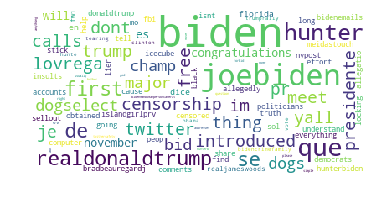

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(
                          background_color='white',
                          max_words=100,
                          max_font_size=50, 
                          random_state=42
                         ).generate(str(biden_subset['clean']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

## Keyword Extraction

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import re
cv=CountVectorizer(max_df=0.8, max_features=10000, ngram_range=(1,3))
X=cv.fit_transform(biden_subset['clean'])

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
 
tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True)
tfidf_transformer.fit(X)
# get feature names
feature_names=cv.get_feature_names()
 
# fetch document for which keywords needs to be extracted
doc=biden_subset['clean'][0]
 
#generate tf-idf for the given document
tf_idf_vector=tfidf_transformer.transform(cv.transform([doc]))

In [ ]:
#Function for sorting tf_idf in descending order
from scipy.sparse import coo_matrix
def sort_coo(coo_matrix):
    tuples = zip(coo_matrix.col, coo_matrix.data)
    return sorted(tuples, key=lambda x: (x[1], x[0]), reverse=True)
 
def extract_topn_from_vector(feature_names, sorted_items, topn=10):
    """get the feature names and tf-idf score of top n items"""
    
    #use only topn items from vector
    sorted_items = sorted_items[:topn]
 
    score_vals = []
    feature_vals = []
    
    # word index and corresponding tf-idf score
    for idx, score in sorted_items:
        
        #keep track of feature name and its corresponding score
        score_vals.append(round(score, 3))
        feature_vals.append(feature_names[idx])
 
    #create a tuples of feature,score
    #results = zip(feature_vals,score_vals)
    results= {}
    for idx in range(len(feature_vals)):
        results[feature_vals[idx]]=score_vals[idx]
    
    return results
#sort the tf-idf vectors by descending order of scores
sorted_items=sort_coo(tf_idf_vector.tocoo())
#extract only the top n; n here is 10
keywords=extract_topn_from_vector(feature_names,sorted_items,5)
 
# now print the results
print("\nAbstract:")
print(doc)
print("\nKeywords:")
for k in keywords:
    print(k,keywords[k])


Abstract:
  en florida joebiden dice que donaldtrump solo se preocupa por él mismo el demócrata fue anfitrión de encuentros de electores en pembrokepines y miramar clic aquí ⬇️⬇️⬇️⠀🌐httpstcoqhiwpiuxstelsollatino yobrilloconelsol 

Keywords:
dice que 0.279
electores 0.275
en florida 0.275
él 0.272
el demócrata 0.271
